Install OpenCV

In [165]:
import cv2
print(cv2.__version__)

4.10.0


https://opencv.org/

Image Processing Basics

Loading and Displaying Images

In [166]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [167]:
img = cv2.imread('dog.jpg')
img2 = cv2.imread('horse.jpg')

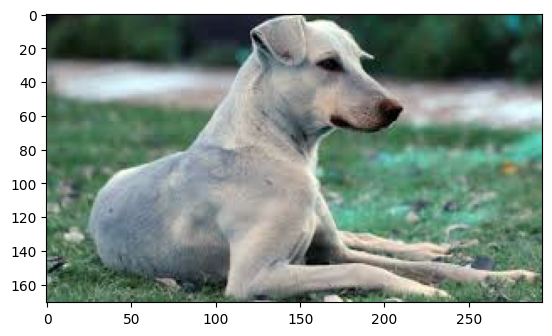

In [168]:
# Display the image
plt.imshow(img)
plt.show()

https://stackoverflow.com/questions/14556545/why-opencv-using-bgr-colour-space-instead-of-rgb

In [169]:
# Convert from BGR to RGB for proper color display
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img2_rgb = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

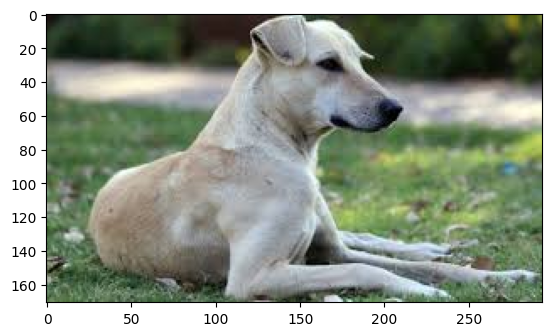

In [170]:
# Display the image
plt.imshow(img_rgb)
plt.show()

In [171]:
img_rgb.shape

(171, 294, 3)

In [172]:
type(img_rgb)

numpy.ndarray

Convert to grayscale

In [173]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

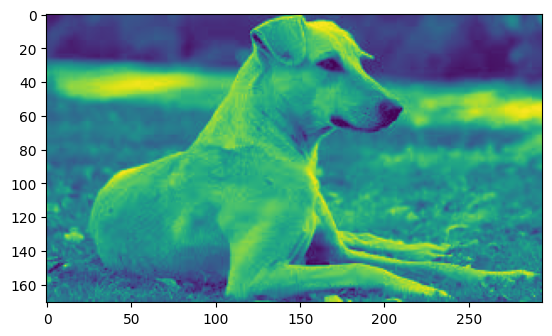

In [174]:
# Display the image
plt.imshow(gray)
plt.show()

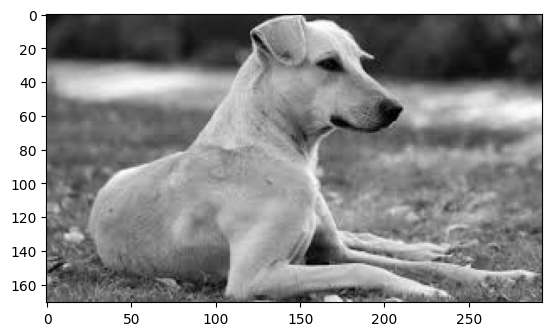

In [175]:
plt.imshow(gray, cmap='gray')  # Specify the color map as 'gray'
plt.show()

In [176]:
gray.shape

(171, 294)

In [177]:
type(gray)

numpy.ndarray

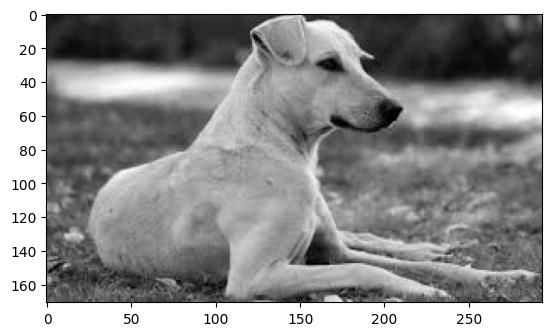

In [178]:
# Display the image
plt.imshow(img_rgb[:,:,0],cmap='gray')
plt.show()

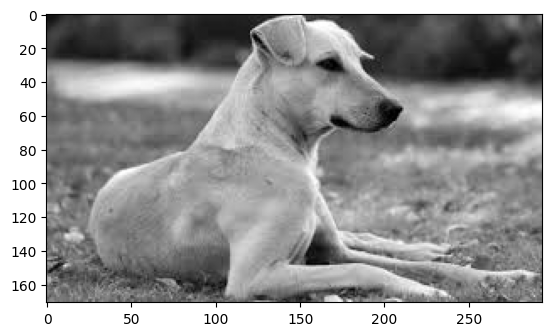

In [179]:
# Display the image
plt.imshow(img_rgb[:,:,1],cmap='gray')
plt.show()

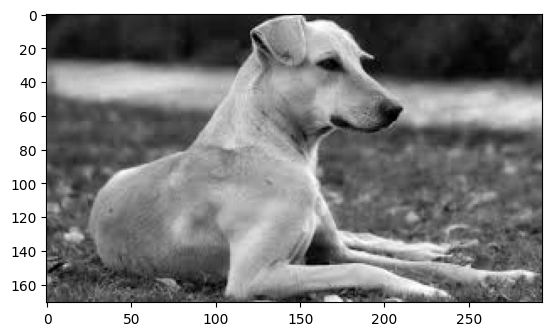

In [180]:
# Display the image
plt.imshow(img_rgb[:,:,2],cmap='gray')
plt.show()

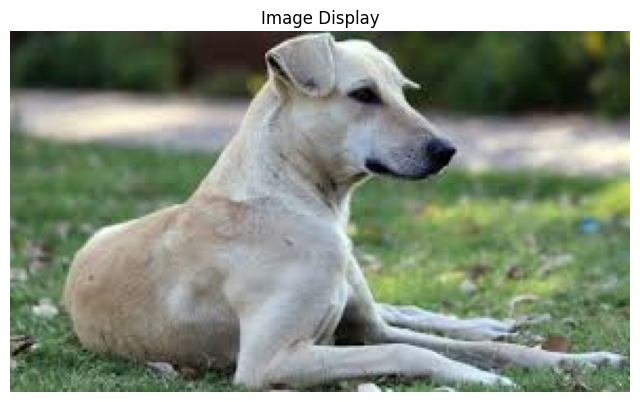

In [181]:
# Create a figure
fig = plt.figure(figsize=(8, 6))  # Specify figure size in inches
# Add a single subplot to the figure
ax = fig.add_subplot(111)  # (1 row, 1 column, 1st subplot)
# Display the image
ax.imshow(img_rgb)
ax.axis('off')  # Turn off axis labels and ticks
ax.set_title("Image Display")  # Set a title for the subplot
# Show the figure
plt.show()

In [182]:
img_rgb.shape

(171, 294, 3)

Resize the image

In [183]:
resized = cv2.resize(img_rgb, (300, 300))

In [184]:
resized.shape

(300, 300, 3)

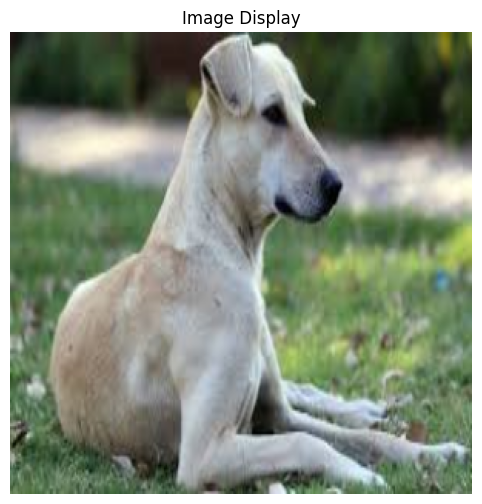

In [185]:
# Create a figure
fig = plt.figure(figsize=(8, 6))  # Specify figure size in inches
# Add a single subplot to the figure
ax = fig.add_subplot(111)  # (1 row, 1 column, 1st subplot)
# Display the image
ax.imshow(resized)
ax.axis('off')  # Turn off axis labels and ticks
ax.set_title("Image Display")  # Set a title for the subplot
# Show the figure
plt.show()

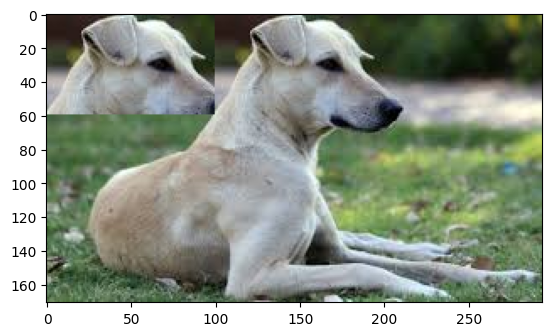

In [186]:
copyimg_rgb = img_rgb.copy()
copyimg_rgb[0:60,0:100]=copyimg_rgb[0:60,100:200]
plt.imshow(copyimg_rgb)
plt.show()

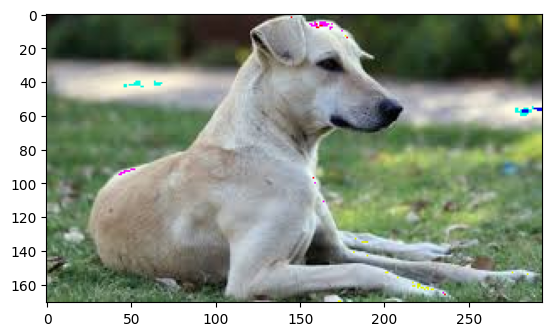

In [187]:
import numpy as np
brightness_value =  2
bright_img = np.clip(img_rgb + brightness_value, 0, 255).astype(np.uint8)
plt.imshow(bright_img)
plt.show()

In [188]:
def increase_brightness_manual(image, brightness_value):
    height = len(image)
    width = len(image[0])
    channels = len(image[0][0])
    bright_image = [[[0 for _ in range(channels)] for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            for k in range(channels):
                bright_image[i][j][k] = min(255, max(0, image[i][j][k] + brightness_value))

    return bright_image


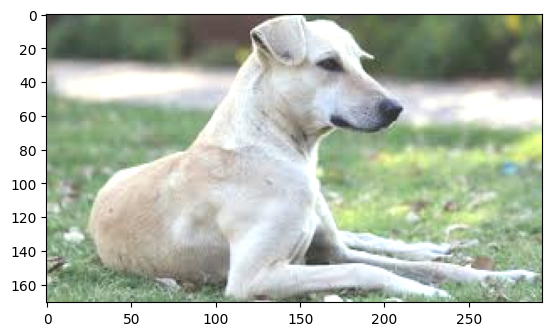

In [189]:
bright_img = increase_brightness_manual(img_rgb, 50)
plt.imshow(bright_img)
plt.show()

In [190]:
def adjust_contrast_manual(image, contrast_factor):
    height = len(image)
    width = len(image[0])
    channels = len(image[0][0])

    contrast_image = [[[0 for _ in range(channels)] for _ in range(width)] for _ in range(height)]

    for i in range(height):
        for j in range(width):
            for k in range(channels):
                contrast_image[i][j][k] = min(255, max(0, int(contrast_factor * (image[i][j][k] - 128) + 128)))

    return contrast_image


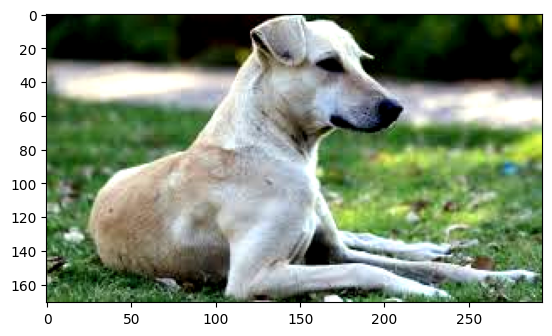

In [191]:
contrast_img = adjust_contrast_manual(img_rgb, 1.5)
plt.imshow(contrast_img)
plt.show()

Add shapes on the image

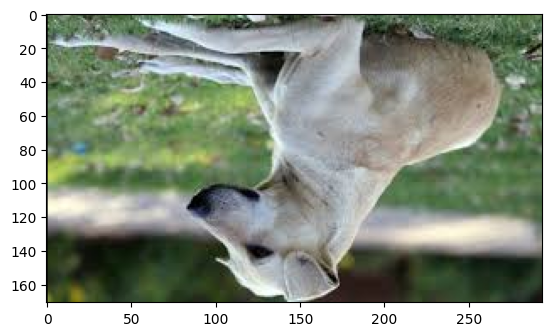

In [192]:
"""cv2.line(img_rgb, (50, 50), (200, 50), (255, 0, 0), 5)
cv2.rectangle(img_rgb, (60, 60), (160, 160), (0, 255, 0), 3)
cv2.circle(img_rgb, (120, 120), 40, (0, 0, 255), -1)
plt.imshow(img_rgb)
plt.show()"""



def rotate_image(image, angle):
  height, width = image.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), angle, 1)
  rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))
  return rotated_image
rotated = rotate_image(img_rgb, 180)
plt.imshow(rotated)
plt.show()

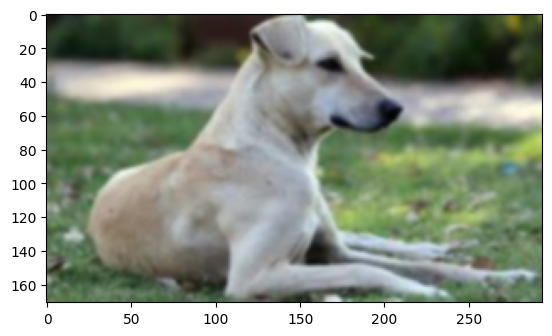

In [193]:
blurred_image = cv2.GaussianBlur(img_rgb, (5, 5), 0)
plt.imshow(blurred_image)
plt.show()

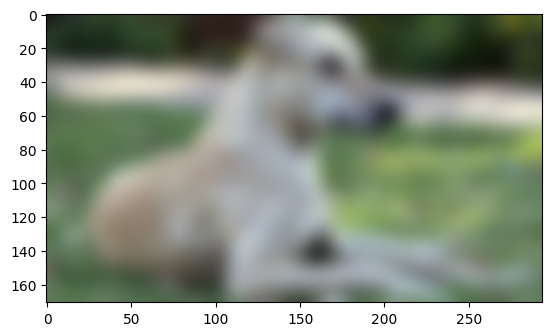

In [194]:
from PIL import Image,ImageFilter
original_image = Image.open('dog.jpg')
blurred_image = original_image.filter(ImageFilter.GaussianBlur(5))
plt.imshow(blurred_image)
plt.show()

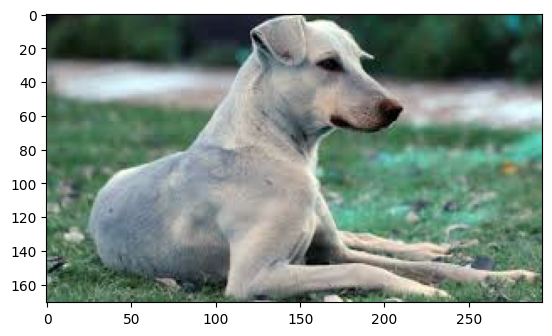

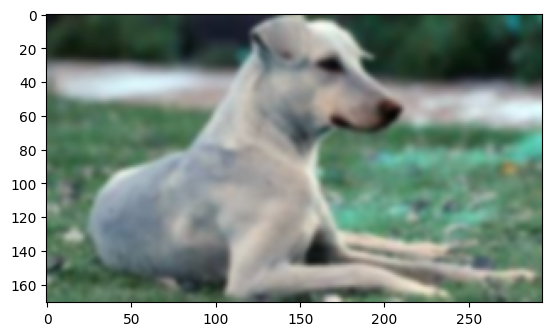

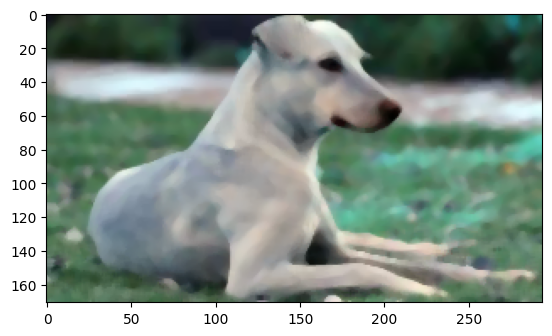

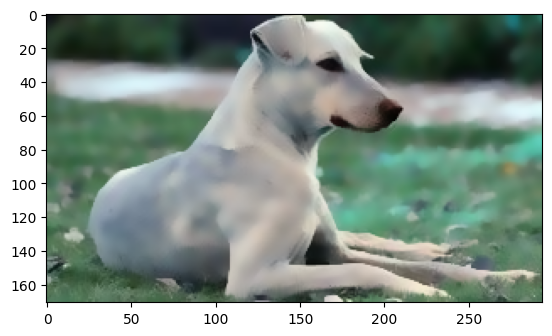

In [195]:
import numpy as np

image = cv2.imread('/content/dog.jpg')

plt.imshow(image)
plt.show()

# Gaussian Blur
Gaussian = cv2.GaussianBlur(image, (7, 7), 0)
plt.imshow(Gaussian)
plt.show()

# Median Blur
median = cv2.medianBlur(image, 5)
plt.imshow(median)
plt.show()


# Bilateral Blur
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
plt.imshow(bilateral)
plt.show()


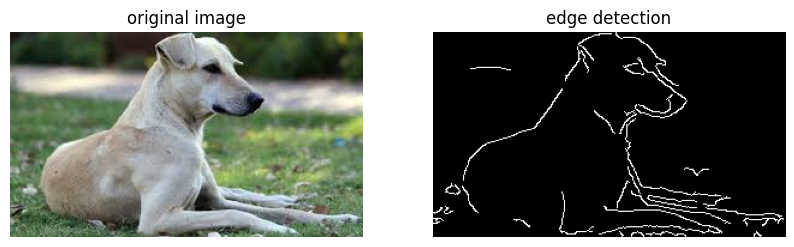

In [196]:
image_path = 'dog.jpg'
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# gaussian blur
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 1.4)

# canny edge detector
edges = cv2.Canny(blurred_image, 100, 200)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(edges, cmap='gray')
plt.title('edge detection')
plt.axis('off')

plt.show()

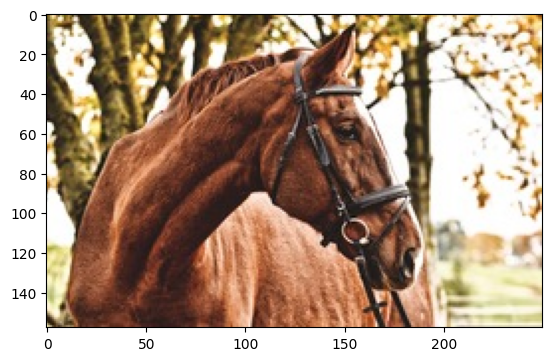

In [197]:
plt.imshow(img2_rgb)
plt.show()

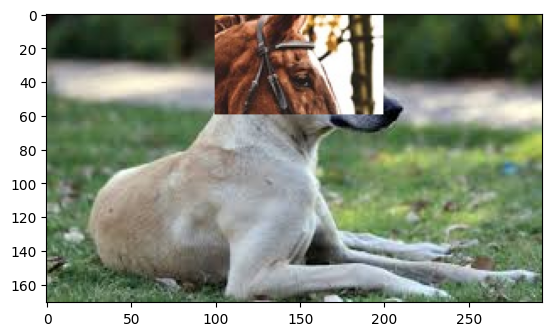

In [200]:
copyimg_rgb = img_rgb.copy()
copyimg2_rgb = img2_rgb.copy()
copyimg_rgb[0:60,100:200] = copyimg2_rgb[20:80,100:200]
plt.imshow(copyimg_rgb)
plt.show()